### # Visualizando dados do SUS - Manipulação de gráficos

### Para esse começo do bootcamp, vamos analisar os dados da saúde disponíveis em:
http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sih/cnv/qiuf.adef

Notebook referente às anotações e desafios da aula 4 do bootcamp

Em que aplicamos: linha=Unidade da federação, Coluna= Ano/mês atendimento, Conteúdo= Valor total, Períodos: Todos disponíveis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline

In [2]:
url_dados = 'https://github.com/silvio-sjsj/bootcamp2_Alura_2021/blob/main/modulo1/A165942189_28_143_208.csv?raw=True'

In [3]:
dados = pd.read_csv(url_dados,
                    encoding="ISO-8859-1",
                    skiprows=3, sep=";", skipfooter=12, engine="python",
                    thousands=".", decimal=",")

In [4]:
colunas_usaveis = dados.mean().index.tolist() #index é uma série imutável, então vamos transformar numa lista de python
colunas_usaveis.insert(0, 'Unidade da Federação') #para que possamos inserir a coluna unidade da federação na posição 0
colunas_usaveis

usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop('Total', axis=1)
usaveis['total acumulado'] = usaveis.sum(axis=1)
indices = usaveis.index

região = []

for i in indices:    
    if i[0] == '1':
        região.append('Norte')
    if i[0] == '2':    
        região.append('Nordeste')
    if i[0] == '3':        
        região.append('Sudeste')
    if i[0] == '4':    
        região.append('Sul')
    if i[0] == '5':
        região.append('Centro-Oeste')

usaveis['Região'] = região

col_name="Região"
first_col = usaveis.pop(col_name)
usaveis.insert(0, col_name, first_col)
usaveis.head()

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,total acumulado
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964107e+08
12 Acre,Norte,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500472e+08
13 Amazonas,Norte,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917245e+09
14 Roraima,Norte,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288766e+08
15 Pará,Norte,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705290e+09


In [7]:
usaveis = usaveis.sort_values('total acumulado', ascending=False)
usaveis_ordenado = usaveis.drop(['total acumulado', 'Região'], axis=1)
usaveis_ordenado.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.038067e+09,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,...,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08,3.241154e+08,2.681931e+08,1.774083e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.062081e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08,1.550645e+08,1.198774e+08,7.978084e+07
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.152037e+08,1.238566e+08,1.250895e+08,1.217712e+08,1.275061e+08,1.334433e+08,1.221463e+08,1.069489e+08,8.313018e+07,4.348073e+07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,9.679936e+07,1.085365e+08,1.117623e+08,1.101079e+08,1.138868e+08,1.167383e+08,1.168340e+08,1.023176e+08,8.440464e+07,3.779883e+07
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.515120e+08,4.412816e+07,4.290085e+07,4.530650e+07,4.395135e+07,...,8.813569e+07,9.594114e+07,8.979547e+07,8.188669e+07,8.057024e+07,8.280731e+07,9.056735e+07,8.720191e+07,6.087310e+07,4.914988e+07


In [8]:
estado_aleatorio = usaveis_ordenado.sample(n=1)
estado_aleatorio

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51261210.58,26222079.1,30716361.81,30589332.79,31420089.9,...,71192450.86,73730927.63,76091056.19,73964434.93,72356982.69,71810830.78,77877186.72,76810042.34,62259409.32,39472738.81


In [21]:
seis_estados = usaveis_ordenado.head(5).append(estado_aleatorio)
seis_estados

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.038067e+09,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,...,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08,3.241154e+08,2.681931e+08,1.774083e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.062081e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08,1.550645e+08,1.198774e+08,7.978084e+07
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.152037e+08,1.238566e+08,1.250895e+08,1.217712e+08,1.275061e+08,1.334433e+08,1.221463e+08,1.069489e+08,8.313018e+07,4.348073e+07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,9.679936e+07,1.085365e+08,1.117623e+08,1.101079e+08,1.138868e+08,1.167383e+08,1.168340e+08,1.023176e+08,8.440464e+07,3.779883e+07
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.515120e+08,4.412816e+07,4.290085e+07,4.530650e+07,4.395135e+07,...,8.813569e+07,9.594114e+07,8.979547e+07,8.188669e+07,8.057024e+07,8.280731e+07,9.056735e+07,8.720191e+07,6.087310e+07,4.914988e+07
26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,5.126121e+07,2.622208e+07,3.071636e+07,3.058933e+07,3.142009e+07,...,7.119245e+07,7.373093e+07,7.609106e+07,7.396443e+07,7.235698e+07,7.181083e+07,7.787719e+07,7.681004e+07,6.225941e+07,3.947274e+07


In [22]:
seis_estados = seis_estados.drop(seis_estados.iloc[:,0:54], axis=1)
seis_estados

,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,2.194705e+08,2.460081e+08,2.310242e+08,2.517428e+08,2.344214e+08,2.443576e+08,2.522717e+08,2.383338e+08,2.794746e+08,2.258439e+08,...,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08,3.241154e+08,2.681931e+08,1.774083e+08
31 Minas Gerais,1.071568e+08,1.221724e+08,1.125693e+08,1.256761e+08,1.157796e+08,1.220126e+08,1.239409e+08,1.147922e+08,1.220992e+08,1.122116e+08,...,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08,1.550645e+08,1.198774e+08,7.978084e+07
41 Paraná,7.296621e+07,8.091312e+07,7.813678e+07,8.540151e+07,7.780115e+07,8.352069e+07,8.383996e+07,7.918799e+07,8.498853e+07,7.872615e+07,...,1.152037e+08,1.238566e+08,1.250895e+08,1.217712e+08,1.275061e+08,1.334433e+08,1.221463e+08,1.069489e+08,8.313018e+07,4.348073e+07
43 Rio Grande do Sul,6.413504e+07,7.362357e+07,6.901026e+07,7.660769e+07,7.478542e+07,7.691695e+07,7.875813e+07,6.941348e+07,7.715556e+07,6.959090e+07,...,9.679936e+07,1.085365e+08,1.117623e+08,1.101079e+08,1.138868e+08,1.167383e+08,1.168340e+08,1.023176e+08,8.440464e+07,3.779883e+07
33 Rio de Janeiro,4.727104e+07,5.937212e+07,5.403008e+07,6.076748e+07,5.600888e+07,5.651641e+07,5.854630e+07,5.309853e+07,5.797400e+07,5.168737e+07,...,8.813569e+07,9.594114e+07,8.979547e+07,8.188669e+07,8.057024e+07,8.280731e+07,9.056735e+07,8.720191e+07,6.087310e+07,4.914988e+07
26 Pernambuco,3.987976e+07,4.578800e+07,4.358497e+07,4.797737e+07,4.313884e+07,4.677200e+07,4.923776e+07,4.462840e+07,4.732886e+07,4.468669e+07,...,7.119245e+07,7.373093e+07,7.609106e+07,7.396443e+07,7.235698e+07,7.181083e+07,7.787719e+07,7.681004e+07,6.225941e+07,3.947274e+07


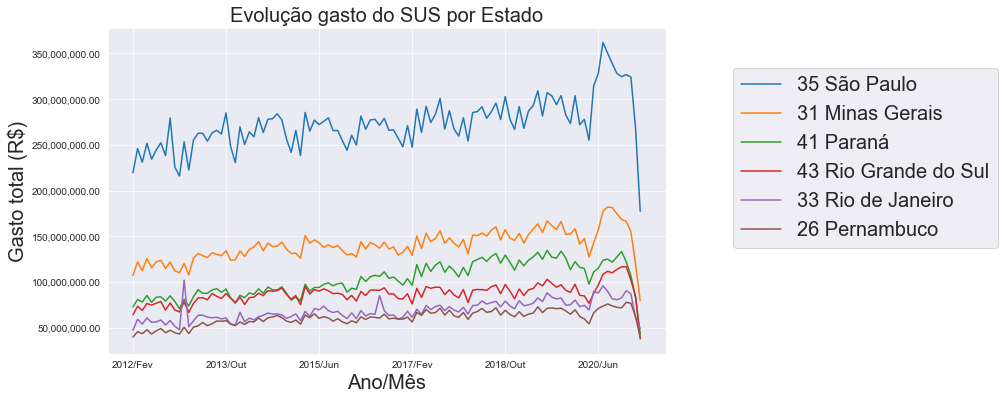

In [27]:
ax = seis_estados.head(6).T.plot(figsize=(10,6))
sns.set_style('darkgrid')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Ano/Mês', fontsize=20)
ax.set_ylabel('Gasto total (R$)', fontsize=20)
plt.title('Evolução gasto do SUS por Estado', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=2, fontsize=20)

E se mudássemos os tamanhos? Tornar o gráfico quadrado, ou aumentar o eixo horizontal...

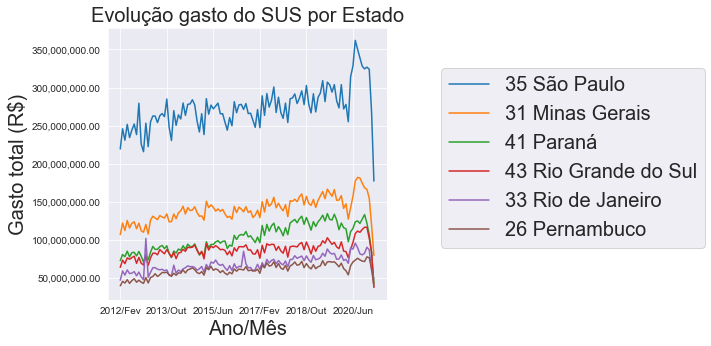

In [28]:
ax = seis_estados.head(6).T.plot(figsize=(5,5))
sns.set_style('darkgrid')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Ano/Mês', fontsize=20)
ax.set_ylabel('Gasto total (R$)', fontsize=20)
plt.title('Evolução gasto do SUS por Estado', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=2, fontsize=20)

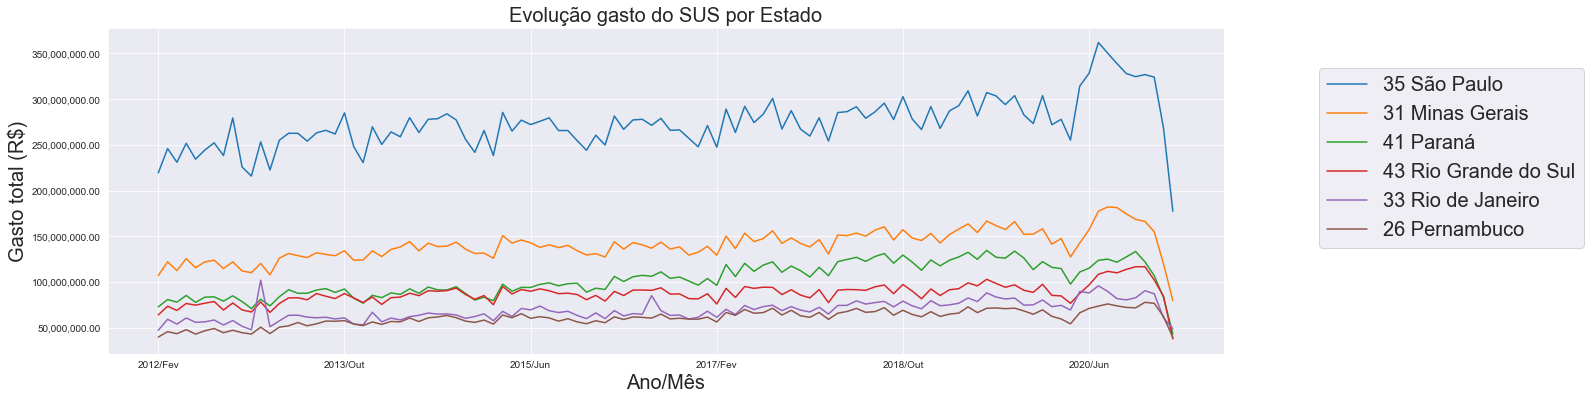

In [30]:
ax = seis_estados.head(6).T.plot(figsize=(20,6))
sns.set_style('darkgrid')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Ano/Mês', fontsize=20)
ax.set_ylabel('Gasto total (R$)', fontsize=20)
plt.title('Evolução gasto do SUS por Estado', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=2, fontsize=20)

Podemos reparar que tornar o gráfico quadrado faz com que a distância de São Paulo pareça muito maior em em relação aos outros estados do que no segundo gráfico em que aumentamos o tamanho do eixo horizontal. No segundo caso, o estado de São Paulo parece muito mais próximo da segunda linha logo abaixo. Também é notável que a distorção do eixo também distorce visualmente a aparência da taxa de crescimento: claramente os intervalos continuam os mesmos, logo a taxa de crescimento é a mesma, porém visualmente o gráfico de baixo parece estável no sentido de que sempre se gasta a mesma quantidade, enquanto que no gráfico de cima parece haver uma tendência de crescimento bem rápido.

E se fizessemos o gráfico em escala de logaritmo?

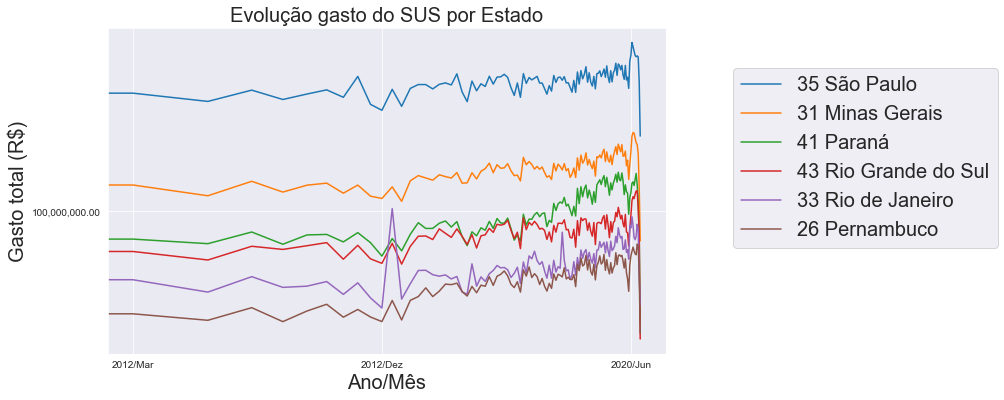

In [39]:
ax = seis_estados.head(6).T.plot(loglog=True, figsize=(10,6))
sns.set_style('darkgrid')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Ano/Mês', fontsize=20)
ax.set_ylabel('Gasto total (R$)', fontsize=20)
plt.title('Evolução gasto do SUS por Estado', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=2, fontsize=20)

Aqui podemos perceber visualmente a proximidade entre as linhas de forma muito mais acentuada, nos trazendo melhor informação, entretanto perdemos parte do eixo vertical, o que pode dificultar a leitura numérica. Mas a evolução é muito mais clara.

Se mudarmos, por exemplo, os limites do eixo vertical, podemos distorcer ainda mais a forma como visualmente apresentamos esses dados, contando uma história que pode enganar muito facilmente quem olhe para o gráfico:

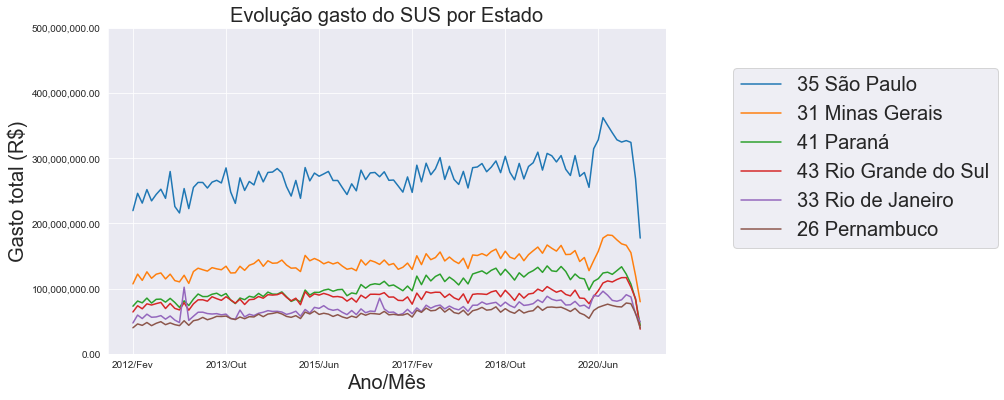

In [45]:
ax = seis_estados.head(6).T.plot(figsize=(10,6))
sns.set_style('darkgrid')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Ano/Mês', fontsize=20)
ax.set_ylabel('Gasto total (R$)', fontsize=20)
plt.ylim(0,500000000)
plt.title('Evolução gasto do SUS por Estado', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=2, fontsize=20)

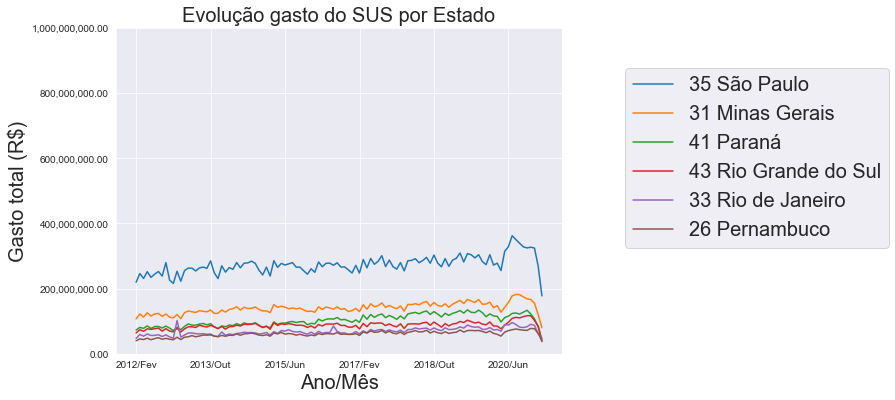

In [48]:
ax = seis_estados.head(6).T.plot(figsize=(8,6))
sns.set_style('darkgrid')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Ano/Mês', fontsize=20)
ax.set_ylabel('Gasto total (R$)', fontsize=20)
plt.ylim(0,1000000000)
plt.title('Evolução gasto do SUS por Estado', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=2, fontsize=20)

Repara-se que agora a distância entre as linhas fica ainda menor. O enorme espaço vazio acima não traz absolutamente nenhuma informação, e serve apenas para a disctorção completa da informação visual que o gráfico nos traz. Reiteramos que não há mentira no gráfico, a informação continua ali de forma verdadeira: a tendência de crescimento, inclinação, intervalos etc não foram mudados, porém para a visualização distorcemos completamente a informação de forma que podemos mentira facilmente para os desavisado. Se rtirarmos as legendas do eixo y podemos criar informações ainda mais dramaticamente distorcidas:

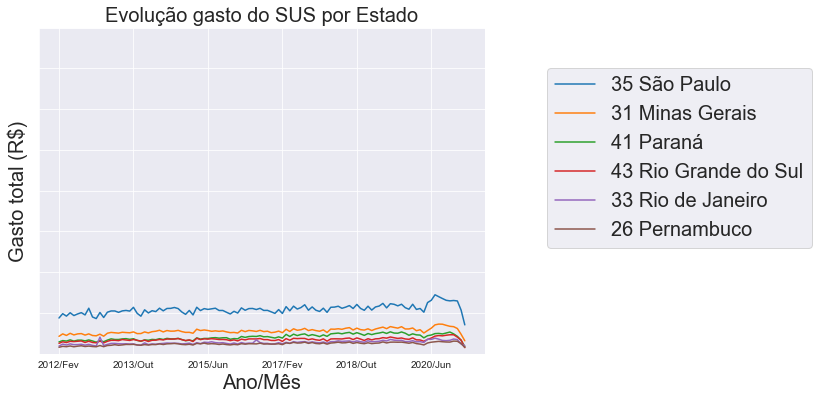

In [57]:
ax = seis_estados.head(6).T.plot(legend=False, figsize=(8,6))
sns.set_style('darkgrid')
ax.axes.yaxis.set_ticklabels([])
ax.set_xlabel('Ano/Mês', fontsize=20)
ax.set_ylabel('Gasto total (R$)', fontsize=20)
plt.ylim(0,2000000000)
plt.title('Evolução gasto do SUS por Estado', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=2, fontsize=20)

### Há muitas formas de se mentir ou manipular informação usando estatística e visualizações gráficas de dados. Não é de se espantar que isso seja muito usado, especialmente em áreas de vendas e mercado financeiro. Sempre duvide e olhe os gráficos, compare os resultados e atente-se às legendas.

### Nosso cérebro é muito visual e é muito facilmente pode ater-se à um padrão visual aparente, mas que é falso e não condiz com nada na realidade.

### E, sempre, muito cuidado com os coachs e com a turma do mercado de ações! =ppp

Como referência deixamos os livros:

- Os números (não) mentem: Como a matemática pode ser usada para enganar você, de Charles Seife
- Como mentir com estatística, de Darrell Huff 